This is an example code from Deep Learning with Python book.

In [57]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.datasets import reuters 

# load and split data into training set and test set
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [58]:
# take a look at the data 

print(f'training set : {train_data.shape}')
print(f'test set: {test_data.shape}')
print('training set example')
print(train_data[0])
      

training set : (8982,)
test set: (2246,)
training set example
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


 Each example is a list of integers (word indices) . We can change it back into words using **get_word_index()**.

In [59]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
                        [(value,key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

`The label associated with an example is an integer between 0 and 45- a topic index.

In [60]:
train_labels[0]

3

## Preparing the data

We are going to vectorize the training data by using integer tensor and the train_label by using one-hot encoding.
One-hot encoding is a widely used format for categorical data, also called categorical encoding.

In [61]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(f'x_train sample : {x_train[0]}')
print(f'x_test sample : {x_test[0]}')
    

x_train sample : [0. 1. 1. ... 0. 0. 0.]
x_test sample : [0. 1. 1. ... 0. 0. 0.]


In [62]:
# one-hot encoding

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i,label in enumerate(labels):
        results[i,label] = 1
    return results

# built in keras function for one-hot encoding
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

print(f'one_hot_train_labels sample : {one_hot_train_labels[0]}')

one_hot_train_labels sample : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Building the network

   In building the stacks of Dense layers, each layer can only access the information from the previous layer's output .
   If one of the layer drops some information regarding the classification, each layer could become information bottleneck.
   That's why we are going to use larger layers.

In [63]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Validating our approach

We are going to split the x_train into partial_x_train and x_val. We are going to put 1000 samples from x_train into x_val

In [64]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [65]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 65ms/step - loss: 2.8219 - accuracy: 0.4856 - val_loss: 1.9433 - val_accuracy: 0.6080
Epoch 2/20
16/16 [==============================] - 1s 53ms/step - loss: 1.5995 - accuracy: 0.6619 - val_loss: 1.4152 - val_accuracy: 0.6910
Epoch 3/20
16/16 [==============================] - 1s 88ms/step - loss: 1.1952 - accuracy: 0.7384 - val_loss: 1.2252 - val_accuracy: 0.7270
Epoch 4/20
16/16 [==============================] - 1s 84ms/step - loss: 0.9717 - accuracy: 0.7907 - val_loss: 1.1200 - val_accuracy: 0.7620
Epoch 5/20
16/16 [==============================] - 1s 52ms/step - loss: 0.8103 - accuracy: 0.8237 - val_loss: 1.0194 - val_accuracy: 0.7860
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.6757 - accuracy: 0.8552 - val_loss: 0.9741 - val_accuracy: 0.7950
Epoch 7/20
16/16 [==============================] - 1s 50ms/step - loss: 0.5741 - accuracy: 0.8763 - val_loss: 0.9391 - val_accuracy: 0.7950
Epoch 8/20
16

## Plotting the Training and Validation Loss

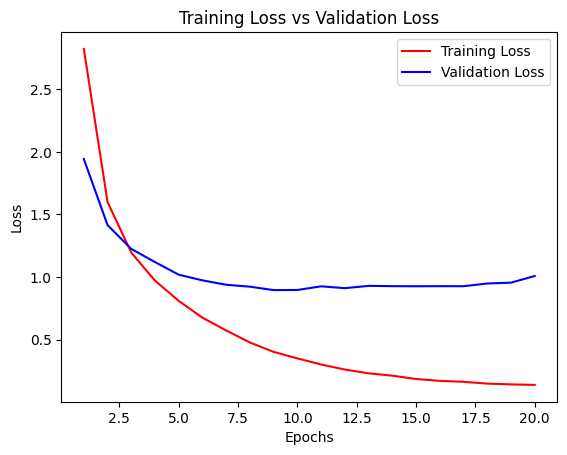

In [66]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [70]:
model = models.Sequential()
#model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dense(46, activation='softplus')) # 0.7947

#model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(46, activation='softmax')) # 0.7885

#model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(128, activation='tanh'))
#model.add(layers.Dense(46, activation='softplus')) # 0.7805

#model.add(layers.Dense(46, activation='softplus', input_shape=(10000,))) # 0.7961

#model.add(layers.Dense(46, activation='softmax', input_shape=(10000,))) # 0.7970

#model.add(layers.Dense(46, activation='softmax', input_shape=(10000,))) # 0.7988

model.add(layers.Dense(96, activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(46, activation='softmax')) # 0.7805


model.compile(optimizer='rmsprop',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
model.fit(partial_x_train,
            partial_y_train,
            epochs=8,
            batch_size=128,
            validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/8
63/63 [==============================] - 3s 43ms/step - loss: 1.6966 - accuracy: 0.6674 - val_loss: 1.1258 - val_accuracy: 0.7480
Epoch 2/8
63/63 [==============================] - 2s 29ms/step - loss: 0.8468 - accuracy: 0.8230 - val_loss: 0.9155 - val_accuracy: 0.8010
Epoch 3/8
63/63 [==============================] - 2s 30ms/step - loss: 0.5626 - accuracy: 0.8841 - val_loss: 0.8215 - val_accuracy: 0.8220
Epoch 4/8
63/63 [==============================] - 1s 20ms/step - loss: 0.3953 - accuracy: 0.9189 - val_loss: 0.7769 - val_accuracy: 0.8370
Epoch 5/8
63/63 [==============================] - 1s 20ms/step - loss: 0.2953 - accuracy: 0.9374 - val_loss: 0.7809 - val_accuracy: 0.8320
Epoch 6/8
63/63 [==============================] - 1s 20ms/step - loss: 0.2355 - accuracy: 0.9445 - val_loss: 0.8108 - val_accuracy: 0.8260
Epoch 7/8
63/63 [==============================] - 1s 20ms/step - loss: 0.1978 - accuracy: 0.9508 - val_loss: 0.8025 - val_accuracy: 0.8380
Epoch 8/8
71/71 [===